# 📝 Exercise M6.04

The aim of this exercise is to:

* verify if a GBDT tends to overfit if the number of estimators is not
  appropriate as previously seen for AdaBoost;
* use the early-stopping strategy to avoid adding unnecessary trees, to
  get the best statistical performances.

We will use the California housing dataset to conduct our experiments.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Similarly to the previous exercise, create a gradient boosting decision tree
and create a validation curve to assess the impact of the number of trees
on the statistical performance of the model. Use the mean absolute error
to assess the statistical performance of the model.

In [3]:
%%time
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import validation_curve

gbdt = GradientBoostingRegressor()
param_range = np.unique(np.logspace(0, 1.8, num=30).astype(int))
train_scores, test_scores = validation_curve(
    gbdt, data_train, target_train,
    param_name='n_estimators', param_range=param_range,
    scoring='neg_mean_absolute_error', n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

CPU times: user 290 ms, sys: 207 ms, total: 497 ms
Wall time: 18.4 s


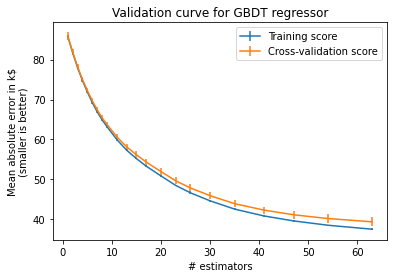

In [5]:
import matplotlib.pyplot as plt

plt.errorbar(param_range, train_errors.mean(axis=1), 
    yerr=train_errors.std(axis=1), label="Training score"
)
plt.errorbar(param_range, test_errors.mean(axis=1), 
    yerr=test_errors.std(axis=1), label="Cross-validation score"
)
plt.legend()
plt.ylabel("Mean absolute error in k$\n(smaller is better)")
plt.xlabel("# estimators")
_ = plt.title("Validation curve for GBDT regressor")

Unlike AdaBoost, the gradient boosting model will always improve when
increasing the number of trees in the ensemble. However, it will reach a
plateau where adding new trees will just make fitting and scoring slower.

To avoid adding new unnecessary tree, gradient boosting offers an
early-stopping option. Internally, the algorithm will use an out-of-sample
set to compute the statistical performance of the model at each addition of a
tree. Thus, if the statistical performance are not improving for several
iterations, it will stop adding trees.

Now, create a gradient-boosting model with `n_estimators=1000`. This number
of trees will be too large. Change the parameter `n_iter_no_change` such
that the gradient boosting fitting will stop after adding 5 trees that do not
improve the overall statistical performance.

In [6]:
%%time
gbdt = GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)
gbdt.fit(data_train, target_train)
gbdt.n_estimators_

CPU times: user 2.21 s, sys: 0 ns, total: 2.21 s
Wall time: 2.21 s


126

We see that the number of trees used is far below 1000 with the current dataset. Training the GBDT with the entire 1000 trees would have been useless.